In [250]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns


In [251]:
df1888=pd.read_csv('engsoccerdata2.csv')
df1888

/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1888-12-15,1888,Accrington F.C.,Aston Villa,1-1,1,1,1,1,2,0,D
1,1889-01-19,1888,Accrington F.C.,Blackburn Rovers,0-2,0,2,1,1,2,-2,A
2,1889-03-23,1888,Accrington F.C.,Bolton Wanderers,2-3,2,3,1,1,5,-1,A
3,1888-12-01,1888,Accrington F.C.,Burnley,5-1,5,1,1,1,6,4,H
4,1888-10-13,1888,Accrington F.C.,Derby County,6-2,6,2,1,1,8,4,H
5,1888-12-29,1888,Accrington F.C.,Everton,3-1,3,1,1,1,4,2,H
6,1889-01-26,1888,Accrington F.C.,Notts County,1-2,1,2,1,1,3,-1,A
7,1888-10-20,1888,Accrington F.C.,Preston North End,0-0,0,0,1,1,0,0,D
8,1889-04-20,1888,Accrington F.C.,Stoke City,2-0,2,0,1,1,2,2,H
9,1888-11-24,1888,Accrington F.C.,West Bromwich Albion,2-1,2,1,1,1,3,1,H


In [269]:
startdate=1983
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf=fulldf.replace('Milton Keynes Dons', 'Wimbledon')
fulldf

,index,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,125436,1983-08-27,1983,West Ham United,Birmingham City,4-0,4,0,1,1,4,4,H
1,125657,1983-08-27,1983,Crystal Palace,Manchester City,0-2,0,2,2,2,2,-2,A
2,125053,1983-08-27,1983,Aston Villa,West Bromwich Albion,4-3,4,3,1,1,7,1,H
3,125726,1983-08-27,1983,Grimsby Town,Shrewsbury Town,1-1,1,1,2,2,2,0,D
4,126888,1983-08-27,1983,Rochdale,Crewe Alexandra,1-0,1,0,4,4,1,1,H
5,126096,1983-08-27,1983,Exeter City,Walsall,0-1,0,1,3,3,1,-1,A
6,126623,1983-08-27,1983,Chesterfield,Swindon Town,1-0,1,0,4,4,1,1,H
7,125764,1983-08-27,1983,Leeds United,Newcastle United,0-1,0,1,2,2,1,-1,A
8,125258,1983-08-27,1983,Nottingham Forest,Southampton,0-1,0,1,1,1,1,-1,A
9,126595,1983-08-27,1983,Chester,Northampton Town,1-1,1,1,4,4,2,0,D


In [270]:
initdictionary={}
initvalues=[1750,1500,1250,1000]
initialrows=[]
#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]





In [271]:
initdictionary

{'AFC Bournemouth': 1250,
 'AFC Wimbledon': 1000,
 'Accrington': 1000,
 'Aldershot': 1000,
 'Arsenal': 1750,
 'Aston Villa': 1750,
 'Barnet': 1000,
 'Barnsley': 1500,
 'Birmingham City': 1750,
 'Blackburn Rovers': 1500,
 'Blackpool': 1000,
 'Bolton Wanderers': 1250,
 'Boston United': 1000,
 'Bradford City': 1250,
 'Brentford': 1250,
 'Brighton & Hove Albion': 1500,
 'Bristol City': 1000,
 'Bristol Rovers': 1250,
 'Burnley': 1250,
 'Burton Albion': 1000,
 'Bury': 1000,
 'Cambridge United': 1500,
 'Cardiff City': 1500,
 'Carlisle United': 1500,
 'Charlton Athletic': 1500,
 'Chelsea': 1500,
 'Cheltenham': 1000,
 'Chester': 1000,
 'Chesterfield': 1000,
 'Colchester United': 1000,
 'Coventry City': 1750,
 'Crawley Town': 1000,
 'Crewe Alexandra': 1000,
 'Crystal Palace': 1500,
 'Dagenham and Redbridge': 1000,
 'Darlington': 1000,
 'Derby County': 1500,
 'Doncaster Rovers': 1000,
 'Everton': 1750,
 'Exeter City': 1250,
 'Fleetwood Town': 1000,
 'Fulham': 1500,
 'Gillingham': 1250,
 'Grimsby 

In [397]:
def loglik(k, initHF, Hk):
    avgE=0
    HFA=initHF
    logliks=0.0
    burn_in=5
    Elodictionary=initdictionary.copy()
    startyear=fulldf['Season'].values[0]
    HFAyear=fulldf['Season'].values[0]
    HFcounter=0.
    Gamecounter=0.
    Rs=0
    #logcount=0
    HFATime=[]
    for ind, row in fulldf.iterrows():
        Home=row['home']
        Away=row['visitor']
        HomeGoals=row['hgoal']
        AwayGoals=row['vgoal']
        year=row['Season']
        HomeELO=Elodictionary[Home]
        AwayELO=Elodictionary[Away]
        Elodif=float((HomeELO-AwayELO+HFA)/400.0)
        avgE+=Elodif
        E=1/(10**(-1*(Elodif))+1)
        #Write Lambda Functions for this to calculate Rvalue and Loglik, gets rid of if statements
        Resfun = lambda x,y: (x > y)*1 + (x == y)*(.5)+(x<y)*0
        R=Resfun(HomeGoals, AwayGoals)
        mloglikfun = lambda x,y: np.log(np.sqrt(y*(1-y))) if x==.5 else np.log((-1*x)+1+(2*x-1)*y)
        MatchLogLik= mloglikfun(R, E)
        #if HomeGoals>AwayGoals:
         #   R=1
          #  MatchLogLik=np.log(E)
       # elif HomeGoals<AwayGoals:
        #    R=0
         #   MatchLogLik=np.log(1-E)
       # else:
        #    R=.5
         #   MatchLogLik=np.log(np.sqrt(E*(1-E)))
        PointExchange=(R-E)*k
        Elodictionary[Home]=HomeELO+PointExchange
        Elodictionary[Away]=AwayELO-PointExchange
        
        
  #      logcount+=-1*np.log10((1-E)/E)
        if year>(startyear+burn_in):
            #print(HFcounter)
            logliks+=MatchLogLik
            Gamecounter+=1.
            HFcounter+=(R-E)
            Rs+=R

        if year>(HFAyear) and year >(startyear+burn_in):
            #print(Gamecounter)
            HFAyear=year
            #avgE=avgE/Gamecounter
            #avgE=0
           
            #logcount=0
            #print(HFcounter)
            #print([HFAyear, HFcounter/Gamecounter, HFA])
            
           
            if(Gamecounter>1):
                #print([year, HFcounter/Gamecounter])
                HFATime.append([HFA, HFAyear, Rs/Gamecounter ])
                HFA+=(HFcounter/Gamecounter)*Hk
                Gamecounter=0           
                Rs=0
                HFcounter=0

    print([k, initHF, Hk, HFA, np.sum(logliks)])
    #print(Elodictionary)
    
    return HFATime

In [400]:
HFATimePlot=loglik(20.96,72.69980954675961, 286.88579845263155)

[20.96, 72.69980954675961, 286.88579845263155, 52.609101949759136, -33807.479797905449]


#### gridsearch=[]

for a in range(10,40,1):
    for b in range(40,100,4):
        l=loglik(a,b)
        z=[a,b,-1*l]
        print(z)
        gridsearch.append(z)

In [288]:
gridsearch

[[10, 40, -34171.579863817358],
 [10, 44, -34132.898357994636],
 [10, 48, -34100.763038344383],
 [10, 52, -34075.152325829629],
 [10, 56, -34056.042805538316],
 [10, 60, -34043.409254192316]]

In [169]:
np.random.uniform(0,1000)

242.7244706152194

In [320]:
from scipy.optimize import minimize
mins=[]
for i in range(10):
    initk=np.random.uniform(0,300)
    inithf=np.random.uniform(50,150)
    inithk=np.random.uniform(0,300)
    x0=[initk,inithf, inithk]
    res=minimize(lambda x: loglik(*x),x0, method='SLSQP', bounds=[[0,300], [50,150], [0,1000]],
                 options={'disp': True})
    row=[i, initk, inithf,inithk,  res['x'][0], res['x'][1], res['x'][2]]
    print(row)
    mins.append(row)

[173.08248923085856, 64.779176953600796, 288.21362547354687, 63.209616578697599, -38193.332964428351]
[173.08248923085856, 64.779176953600796, 288.21362547354687, 63.209616578697599, -38193.332964428351]
[173.08248924575972, 64.779176953600796, 288.21362547354687, 63.209616580043146, -38193.332965025606]
[173.08248923085856, 64.779176968501957, 288.21362547354687, 63.209616578699197, -38193.332964421825]
[173.08248923085856, 64.779176953600796, 288.21362548844803, 63.209616578209655, -38193.332964428315]
[133.00143454335856, 65.217165234850796, 288.21606687979687, 59.815335937627538, -36683.014556467206]
[133.00143454335856, 65.217165234850796, 288.21606687979687, 59.815335937627538, -36683.014556467206]
[133.00143455825972, 65.217165234850796, 288.21606687979687, 59.815335938805475, -36683.014556991919]
[133.00143454335856, 65.217165249751957, 288.21606687979687, 59.815335937629335, -36683.014556462054]
[133.00143454335856, 65.217165234850796, 288.21606689469803, 59.815335937155808, -

[6.3950720050170844, 67.803124926455055, 288.28386896181411, 52.603046094095404, -34368.582925699142]
[27.586598202608069, 67.080016675765123, 288.30037373474892, 52.913940217318107, -33843.880701035203]
[27.586598202608069, 67.080016675765123, 288.30037373474892, 52.913940217318107, -33843.880701035203]
[27.586598217509231, 67.080016675765123, 288.30037373474892, 52.913940218129966, -33843.880701180962]
[27.586598202608069, 67.080016690666284, 288.30037373474892, 52.913940217322128, -33843.880701032511]
[27.586598202608069, 67.080016675765123, 288.30037374965008, 52.91394021689625, -33843.880701035137]
[15.586587090070797, 67.68403807865846, 288.30189677178794, 52.337024320609956, -33844.96479960523]
[21.641449415662311, 67.379266157871754, 288.30112829086727, 52.601483357606419, -33808.356151858046]
[21.641449415662311, 67.379266157871754, 288.30112829086727, 52.601483357606419, -33808.356151858046]
[21.641449430563473, 67.379266157871754, 288.30112829086727, 52.601483358349164, -338

[126.99186737810462, 118.77276333848575, 180.18142957844705, 63.537929171949074, -36525.754585817209]
[126.99186737810462, 118.77276332358458, 180.18142959334821, 63.537929171141158, -36525.754585778493]
[6.9505290412053e-11, 108.91790756418619, 181.76828005333957, 84.935856711344414, -47871.891499869867]
[109.23733548921855, 117.39497154484211, 180.40328463059384, 62.128359365262071, -35929.484467522889]
[109.23733548921855, 117.39497154484211, 180.40328463059384, 62.128359365262071, -35929.484467522889]
[109.23733550411971, 117.39497154484211, 180.40328463059384, 62.128359366394939, -35929.484468004441]
[109.23733548921855, 117.39497155974327, 180.40328463059384, 62.128359365296468, -35929.484467555085]
[109.23733548921855, 117.39497154484211, 180.40328464549501, 62.128359364505449, -35929.484467518065]
[0.0, 107.24812485920626, 181.89539747226567, 84.903469617872659, -47871.993645945833]
[96.714880920967431, 116.23178474554101, 180.57433343169157, 61.186997678054801, -35532.80675539

[20.937726772238996, 100.70285560392851, 182.07943308186614, 56.184387160481634, -33825.283455652643]
[20.937726787140157, 100.70285560392851, 182.07943308186614, 56.184387161292562, -33825.283455652716]
[20.937726772238996, 100.70285561882967, 182.07943308186614, 56.184387160512493, -33825.283455669814]
[20.937726772238996, 100.70285560392851, 182.0794330967673, 56.184387159820304, -33825.2834556507]
[20.619312083910597, 99.32075848421637, 182.23276442332124, 56.157498681353722, -33823.815105687805]
[20.619312083910597, 99.32075848421637, 182.23276442332124, 56.157498681353722, -33823.815105687805]
[20.619312098811758, 99.32075848421637, 182.23276442332124, 56.15749868215719, -33823.815105677881]
[20.619312083910597, 99.320758499117531, 182.23276442332124, 56.157498681384247, -33823.815105704052]
[20.619312083910597, 99.32075848421637, 182.2327644382224, 56.157498680694751, -33823.815105686022]
[19.962941875013964, 88.530974842853666, 183.42611520473642, 56.049125960687597, -33815.198

[207.21872855986214, 129.03846927521457, 120.10919554360289, 75.840288379865939, -39760.569997837665]
[207.21872855986214, 129.03846927521457, 120.10919554360289, 75.840288379865939, -39760.569997837665]
[207.2187285747633, 129.03846927521457, 120.10919554360289, 75.840288381487952, -39760.56999849734]
[207.21872855986214, 129.03846929011573, 120.10919554360289, 75.840288380245141, -39760.569997904029]
[207.21872855986214, 129.03846927521457, 120.10919555850406, 75.840288378147989, -39760.569997820159]
[162.94870902861214, 124.58485599396457, 121.28400023110289, 71.091781015055147, -37898.702095940665]
[162.94870902861214, 124.58485599396457, 121.28400023110289, 71.091781015055147, -37898.702095940665]
[162.9487090435133, 124.58485599396457, 121.28400023110289, 71.091781016471941, -37898.70209652093]
[162.94870902861214, 124.58485600886573, 121.28400023110289, 71.091781015377407, -37898.702095999004]
[162.94870902861214, 124.58485599396457, 121.28400024600406, 71.091781013453868, -3789

[0.0, 90.643003478838565, 127.40735719566418, 88.615437475014772, -47882.975941704943]
[34.308608543982011, 102.85621960978261, 125.64949314537394, 60.371989369281536, -33962.129207294885]
[34.308608543982011, 102.85621960978261, 125.64949314537394, 60.371989369281536, -33962.129207294885]
[34.308608558883172, 102.85621960978261, 125.64949314537394, 60.37198937025051, -33962.129207524573]
[34.308608543982011, 102.85621962468377, 125.64949314537394, 60.371989369501271, -33962.129207321916]
[34.308608543982011, 102.85621960978261, 125.6494931602751, 60.371989368062259, -33962.129207290513]
[6.7592650737117097, 91.929287284471442, 127.09109577745539, 59.247905642719061, -34333.11871642818]
[26.797422708544971, 99.87704809539693, 126.04253863780478, 59.813544951284364, -33862.982833156217]
[26.797422708544971, 99.87704809539693, 126.04253863780478, 59.813544951284364, -33862.982833156217]
[26.797422723446132, 99.87704809539693, 126.04253863780478, 59.813544952227069, -33862.982833289585]
[

[20.985371219262063, 74.833696404950516, 145.93105507935456, 57.897714373195953, -33810.486522942723]
[20.985371204360902, 74.833696419851677, 145.93105507935456, 57.89771437244638, -33810.486522943815]
[20.985371204360902, 74.833696404950516, 145.93105509425573, 57.89771437151628, -33810.48652294054]
[20.854866698826459, 74.857201425160298, 146.87853608778505, 57.837773871543668, -33810.449802501244]
[20.854866698826459, 74.857201425160298, 146.87853608778505, 57.837773871543668, -33810.449802501244]
[20.85486671372762, 74.857201425160298, 146.87853608778505, 57.837773872387601, -33810.44980249834]
[20.854866698826459, 74.857201440061459, 146.87853608778505, 57.837773871638603, -33810.449802503485]
[20.854866698826459, 74.857201425160298, 146.87853610268621, 57.837773870718344, -33810.449802500312]
[20.794928927479202, 75.044960381895834, 148.53723743776496, 57.744268580831594, -33810.410414450373]
[20.794928927479202, 75.044960381895834, 148.53723743776496, 57.744268580831594, -33810

[20.967385681248118, 72.485880144482877, 341.1578725323368, 51.155524188408513, -33807.407618615674]
[20.97056784606567, 72.504733721293903, 341.16130725567615, 51.15558960029923, -33807.407560579006]
[20.971927836454284, 72.512791343926338, 341.16277518427091, 51.155617560628706, -33807.407544801739]
[20.97254208899485, 72.516430645508393, 341.1634381881247, 51.155630190091188, -33807.407539447377]
[20.972826424144102, 72.518115264277029, 341.16374509007017, 51.155636036413739, -33807.407537342267]
[20.972959538159731, 72.518903933457338, 341.16388876893109, 51.155638773463281, -33807.407536438048]
[20.97302218674816, 72.519275111583482, 341.16395638974308, 51.155640061633576, -33807.40753602983]
[20.97305174241804, 72.51945022196405, 341.16398829115451, 51.155640669354611, -33807.407535841638]
[20.973065703860836, 72.519532940223257, 341.16400336067363, 51.155640956429018, -33807.407535753809]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 

[20.883133420183295, 71.972453328799972, 161.31765958525301, 57.073208772004875, -33809.605401937806]
[20.883133435084456, 71.972453328799972, 161.31765958525301, 57.073208772835521, -33809.605401935383]
[20.883133420183295, 71.972453343701133, 161.31765958525301, 57.07320877206098, -33809.605401937864]
[20.883133420183295, 71.972453328799972, 161.31765960015417, 57.073208771274125, -33809.60540193694]
[20.851041637968791, 71.815563526717995, 161.68627665954799, 57.052785681318632, -33809.597995732111]
[20.851041637968791, 71.815563526717995, 161.68627665954799, 57.052785681318632, -33809.597995732111]
[20.851041652869952, 71.815563526717995, 161.68627665954799, 57.052785682148169, -33809.597995728851]
[20.851041637968791, 71.815563541619156, 161.68627665954799, 57.052785681373976, -33809.597995732118]
[20.851041637968791, 71.815563526717995, 161.68627667444915, 57.052785680590141, -33809.597995730983]
[20.668278383853668, 70.884692994881632, 163.96088224881461, 56.929190012945156, -33

[20.417030869562595, 76.474958684863992, 254.1014280743442, 53.542858027956918, -33808.199862690148]
[20.417030884463756, 76.474958684863992, 254.1014280743442, 53.542858028696415, -33808.19986267318]
[20.417030869562595, 76.474958699765153, 254.1014280743442, 53.542858027962794, -33808.199862691821]
[20.417030869562595, 76.474958684863992, 254.10142808924536, 53.54285802750114, -33808.199862689973]
[20.644734000421256, 76.484270877719084, 261.26999815562465, 53.337214643092743, -33807.93491735054]
[20.644734000421256, 76.484270877719084, 261.26999815562465, 53.337214643092743, -33807.93491735054]
[20.644734015322417, 76.484270877719084, 261.26999815562465, 53.337214643832539, -33807.934917341234]
[20.644734000421256, 76.484270892620245, 261.26999815562465, 53.337214643098228, -33807.934917352221]
[20.644734000421256, 76.484270877719084, 261.26999817052581, 53.33721464264643, -33807.93491735078]
[21.561067034537121, 74.75595586649311, 245.29364737007492, 53.873617377480471, -33808.1971

[118.30023222826387, 114.94676317791426, 296.1924476107813, 58.444985412901914, -36203.01811765389]
[118.30023222826387, 114.94676317791426, 296.1924476107813, 58.444985412901914, -36203.01811765389]
[118.30023224316503, 114.94676317791426, 296.1924476107813, 58.444985414013885, -36203.018118151478]
[118.30023222826387, 114.94676319281542, 296.1924476107813, 58.444985412905233, -36203.018117673484]
[118.30023222826387, 114.94676317791426, 296.19244762568246, 58.444985412442875, -36203.018117652464]
[2.9302782422746532e-11, 109.16784565310721, 296.55840340813319, 78.531400594301644, -47867.089299928783]
[103.31403498676352, 114.21469362709514, 296.23880665553958, 57.357171692415399, -35715.994948162457]
[103.31403498676352, 114.21469362709514, 296.23880665553958, 57.357171692415399, -35715.994948162457]
[103.31403500166468, 114.21469362709514, 296.23880665553958, 57.357171693463599, -35715.994948631749]
[103.31403498676352, 114.21469364199631, 296.23880665553958, 57.357171692418923, -35

[22.775355688290404, 104.06432720330928, 296.70943050716687, 52.43647821372079, -33824.225902906728]
[19.779835863337329, 102.42984991711664, 296.81155808666767, 52.286690991493458, -33821.056499833467]
[19.779835863337329, 102.42984991711664, 296.81155808666767, 52.286690991493458, -33821.056499833467]
[19.77983587823849, 102.42984991711664, 296.81155808666767, 52.286690992187062, -33821.056499795581]
[19.779835863337329, 102.4298499320178, 296.81155808666767, 52.286690991499249, -33821.056499845763]
[19.779835863337329, 102.42984991711664, 296.81155810156883, 52.286690991082978, -33821.05649983263]
[20.841903193055597, 102.08759079168404, 296.83966788888358, 52.336197329066579, -33819.349589354002]
[20.841903193055597, 102.08759079168404, 296.83966788888358, 52.336197329066579, -33819.349589354002]
[20.841903207956758, 102.08759079168404, 296.83966788888358, 52.336197329786657, -33819.349589351383]
[20.841903193055597, 102.0875908065852, 296.83966788888358, 52.33619732907232, -33819.

[20.222048268731438, 62.235071619034677, 4.8842652097899846, 63.1392245521494, -33821.457550471474]
[20.222048253830277, 62.235071633935839, 4.8842652097899846, 63.139224564749121, -33821.457550473067]
[20.222048253830277, 62.235071619034677, 4.8842652246911458, 63.139224554371346, -33821.457550493498]
[20.590467395746956, 64.917046398969632, 5.0528257506286778, 65.451411075170341, -33818.592506454639]
[20.590467395746956, 64.917046398969632, 5.0528257506286778, 65.451411075170341, -33818.592506454639]
[20.590467410648117, 64.917046398969632, 5.0528257506286778, 65.451411075320323, -33818.592506443274]
[20.590467395746956, 64.917046413870793, 5.0528257506286778, 65.451411087851426, -33818.592506448003]
[20.590467395746956, 64.917046398969632, 5.052825765529839, 65.451411076431384, -33818.592506455221]
[20.957830803506035, 66.157804397370626, 5.0626781001587542, 66.511644214580244, -33818.168200093482]
[20.957830803506035, 66.157804397370626, 5.0626781001587542, 66.511644214580244, -338

[20.966237646388581, 66.347350962670731, 7.4322459254209074e-14, 66.347350962670731, -33817.793082067794]
[20.966200281571894, 66.347303811892047, 6.3664194688854565e-14, 66.347303811892047, -33817.793082146636]
[20.966180421284896, 66.347278750133952, 5.7999074077123127e-14, 66.347278750133952, -33817.793082190452]
[20.966169834600919, 66.347265390764434, 5.4979236467502577e-14, 66.347265390764434, -33817.79308221332]
[20.96616419911658, 66.347258279329168, 5.3371722009015762e-14, 66.347258279329168, -33817.793082226744]
[20.966161179199307, 66.347254468486142, 5.2510294599764521e-14, 66.347254468486142, -33817.79308223338]
[20.966159569838037, 66.347252437628143, 5.2051226424799146e-14, 66.347252437628143, -33817.793082236836]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 33817.793082236836
            Iterations: 18
            Function evaluations: 106
            Gradient evaluations: 18
[5, 48.37726992474657, 50.80671383364101, 2.41930

[20.244658332890676, 67.916271029310806, 66.742589965218414, 63.602884095950927, -33816.58144804748]
[20.308509539853681, 68.390278606849122, 74.200517250015949, 62.972243749735057, -33815.810570142668]
[20.308509539853681, 68.390278606849122, 74.200517250015949, 62.972243749735057, -33815.810570142668]
[20.308509554754842, 68.390278606849122, 74.200517250015949, 62.972243750582926, -33815.810570121939]
[20.308509539853681, 68.390278621750284, 74.200517250015949, 62.972243751007206, -33815.810570141519]
[20.308509539853681, 68.390278606849122, 74.20051726491711, 62.97224374838585, -33815.810570141039]
[19.947607425502852, 73.143856203246088, 171.76834644176131, 56.531585331553138, -33810.319181671446]
[19.947607425502852, 73.143856203246088, 171.76834644176131, 56.531585331553138, -33810.319181671446]
[19.947607440404013, 73.143856203246088, 171.76834644176131, 56.531585332350147, -33810.319181639104]
[19.947607425502852, 73.143856218147249, 171.76834644176131, 56.531585331592233, -338

[66.448790589268214, 132.551753954102, 117.44762978116785, 63.850317706982565, -34755.760802944416]
[66.448790589268214, 132.551753954102, 117.44762978116785, 63.850317706982565, -34755.760802944416]
[66.448790604169375, 132.551753954102, 117.44762978116785, 63.850317708011197, -34755.760803334189]
[66.448790589268214, 132.55175396900316, 117.44762978116785, 63.85031770730798, -34755.760803004232]
[66.448790589268214, 132.551753954102, 117.44762979606901, 63.850317705258831, -34755.760802927478]
[40.291564026768214, 128.537593797852, 118.58434853116785, 61.877861444005831, -34137.386674481342]
[40.291564026768214, 128.537593797852, 118.58434853116785, 61.877861444005831, -34137.386674481342]
[40.291564041669375, 128.537593797852, 118.58434853116785, 61.877861444991929, -34137.386674760703]
[40.291564026768214, 128.53759381275316, 118.58434853116785, 61.877861444308799, -34137.386674534042]
[40.291564026768214, 128.537593797852, 118.58434854606901, 61.877861442385424, -34137.38667446723

[21.231419836855309, 71.393681958283153, 133.87556910708082, 58.585426234831687, -33810.948041964424]
[21.096312881541532, 71.391704359823208, 133.92089748568731, 58.574833507349041, -33810.88731804632]
[21.096312881541532, 71.391704359823208, 133.92089748568731, 58.574833507349041, -33810.88731804632]
[21.096312896442694, 71.391704359823208, 133.92089748568731, 58.574833508210645, -33810.887318050685]
[21.096312881541532, 71.39170437472437, 133.92089748568731, 58.57483350749991, -33810.887318046145]
[21.096312881541532, 71.391704359823208, 133.92089750058847, 58.574833506446183, -33810.887318045658]
[20.83351829001845, 71.594849666009324, 137.61366256139976, 58.341152628257589, -33810.68141173495]
[20.83351829001845, 71.594849666009324, 137.61366256139976, 58.341152628257589, -33810.68141173495]
[20.833518304919611, 71.594849666009324, 137.61366256139976, 58.341152629109907, -33810.681411731181]
[20.83351829001845, 71.594849680910485, 137.61366256139976, 58.341152628389537, -33810.681

[20.980818747087056, 72.792556651808582, 286.70290913726421, 52.615293614019691, -33807.48098578932]
[20.980818761988218, 72.792556651808582, 286.70290913726421, 52.615293614749902, -33807.480985790062]
[20.980818747087056, 72.792556666709743, 286.70290913726421, 52.615293614024161, -33807.480985789312]
[20.980818747087056, 72.792556651808582, 286.70290915216538, 52.615293613600493, -33807.480985789218]
[20.953487459954001, 72.732141528906226, 286.78669270868244, 52.611579958540752, -33807.480113313606]
[20.953487459954001, 72.732141528906226, 286.78669270868244, 52.611579958540752, -33807.480113313606]
[20.953487474855162, 72.732141528906226, 286.78669270868244, 52.61157995927033, -33807.480113313562]
[20.953487459954001, 72.732141543807387, 286.78669270868244, 52.611579958545207, -33807.480113313497]
[20.953487459954001, 72.732141528906226, 286.7866927235836, 52.611579958121624, -33807.480113313417]
[20.916676605330384, 72.587952867252639, 287.19386398134588, 52.598288976195704, -338

[67.433073879497499, 126.48328327429095, 267.36015242298316, 55.887277938589001, -34698.92204905449]
[1.354294454358751e-11, 115.6115143779824, 268.37023648629486, 79.832909500703053, -47867.781301315692]
[60.689766491549101, 125.3961063846601, 267.46116081590327, 55.470558524364463, -34525.238191795121]
[60.689766491549101, 125.3961063846601, 267.46116081590327, 55.470558524364463, -34525.238191795121]
[60.689766506450262, 125.3961063846601, 267.46116081590327, 55.470558525267805, -34525.238192164907]
[60.689766491549101, 125.39610639956126, 267.46116081590327, 55.470558524370574, -34525.238191819924]
[60.689766491549101, 125.3961063846601, 267.46116083080443, 55.470558523899825, -34525.238191792901]
[0.0, 114.4218443757685, 268.35022885080758, 79.832286546855485, -47867.711908625068]
[54.620789842394188, 124.29868018377094, 267.5500676193937, 55.102532076250739, -34377.065545234705]
[54.620789842394188, 124.29868018377094, 267.5500676193937, 55.102532076250739, -34377.065545234705]
[

[21.069903437466369, 72.280938446233989, 271.16254510191578, 53.064543022146687, -33807.574419701952]
[21.069903437466369, 72.280938431332828, 271.16254511681694, 53.064543021707095, -33807.574419702556]
[20.955381460318016, 73.125935638001394, 271.09639323536237, 53.061052969074773, -33807.559823140022]
[20.955381460318016, 73.125935638001394, 271.09639323536237, 53.061052969074773, -33807.559823140022]
[20.955381475219177, 73.125935638001394, 271.09639323536237, 53.061052969814831, -33807.559823139673]
[20.955381460318016, 73.125935652902555, 271.09639323536237, 53.061052969079718, -33807.559823140065]
[20.955381460318016, 73.125935638001394, 271.09639325026353, 53.061052968640006, -33807.559823139592]
[20.964621135727185, 73.013544395013795, 271.12879560133683, 53.060529565151107, -33807.558729466531]
[20.964621135727185, 73.013544395013795, 271.12879560133683, 53.060529565151107, -33807.558729466531]
[20.964621150628346, 73.013544395013795, 271.12879560133683, 53.060529565891329, -

[61.828822867265458, 101.57134144595079, 144.76794099636351, 60.761408124650721, -34536.943121257187]
[61.828822882166619, 101.57134144595079, 144.76794099636351, 60.761408125640067, -34536.943121630211]
[61.828822867265458, 101.57134146085195, 144.76794099636351, 60.761408124762347, -34536.943121280376]
[61.828822867265458, 101.57134144595079, 144.76794101126467, 60.761408123670691, -34536.943121253629]
[0.0, 92.691179113149502, 146.04012213645836, 87.274626484390168, -47879.853552399924]
[55.645940580538912, 100.68332521267067, 144.89515911037299, 60.338767300088868, -34384.792643114692]
[55.645940580538912, 100.68332521267067, 144.89515911037299, 60.338767300088868, -34384.792643114692]
[55.645940595440074, 100.68332521267067, 144.89515911037299, 60.338767301065204, -34384.792643467794]
[55.645940580538912, 100.68332522757183, 144.89515911037299, 60.338767300199322, -34384.792643137334]
[55.645940580538912, 100.68332521267067, 144.89515912527415, 60.338767299118864, -34384.792643111

[20.969632896444388, 71.71270290897948, 148.74535106086455, 57.723009400179265, -33810.125079989892]
[20.969632896444388, 71.71270290897948, 148.74535106086455, 57.723009400179265, -33810.125079989892]
[20.969632911345549, 71.71270290897948, 148.74535106086455, 57.723009401024129, -33810.125079990758]
[20.969632896444388, 71.712702923880641, 148.74535106086455, 57.723009400267323, -33810.125079989972]
[20.969632896444388, 71.71270290897948, 148.74535107576571, 57.72300939937643, -33810.12507998931]
[20.953138537468941, 71.631146681263871, 148.79166400031423, 57.719098666130073, -33810.12320521332]
[20.953138537468941, 71.631146681263871, 148.79166400031423, 57.719098666130073, -33810.12320521332]
[20.953138552370103, 71.631146681263871, 148.79166400031423, 57.719098666974531, -33810.123205213589]
[20.953138537468941, 71.631146696165032, 148.79166400031423, 57.719098666217938, -33810.123205213014]
[20.953138537468941, 71.631146681263871, 148.79166401521539, 57.719098665327785, -33810.12

[20.937588942822561, 79.208534792472236, 189.8365915950246, 55.816226079580176, -33809.615329657412]
[20.938195029303149, 79.178715597159879, 189.6068958241091, 55.825625619419647, -33809.614673325443]
[20.938479984408751, 79.164695927984937, 189.49890301325723, 55.830049281942571, -33809.614378805949]
[20.938614323609958, 79.158086496811009, 189.44799089531088, 55.832135753769705, -33809.614243079399]
[20.938614323609958, 79.158086496811009, 189.44799089531088, 55.832135753769705, -33809.614243079399]
[20.938614338511119, 79.158086496811009, 189.44799089531088, 55.832135754574381, -33809.614243079006]
[20.938614323609958, 79.15808651171217, 189.44799089531088, 55.832135753792102, -33809.614243083292]
[20.938614323609958, 79.158086496811009, 189.44799091021204, 55.832135753158134, -33809.614243078548]
[20.906238702460048, 78.412409896639659, 189.409591214767, 55.830843597694496, -33809.430137324031]
[20.906238702460048, 78.412409896639659, 189.409591214767, 55.830843597694496, -33809.4

[20.946170396580293, 71.801999646122923, 193.90885107654645, 55.642441452428628, -33808.611463689202]
[20.951483625426167, 71.884035424268845, 193.37826179442484, 55.663908791134666, -33808.622211042974]
[20.947312978390922, 71.819641007082382, 193.79475064112387, 55.647052177055762, -33808.61373779663]
[20.946418368534413, 71.805828310915018, 193.88408810464793, 55.643441842813758, -33808.611955511893]
[20.946224319825959, 71.802832216212934, 193.90346618246267, 55.642658982313336, -33808.611570558518]
[20.946182127581025, 71.802180771724963, 193.90767958131525, 55.642488775920611, -33808.611486934817]
[20.946172948886868, 71.802039053508153, 193.90859618339434, 55.642451749005929, -33808.611468746705]
[20.946170951877825, 71.802008219867176, 193.90879560856391, 55.642443693084559, -33808.611464789312]
[20.946170517401153, 71.802001511586212, 193.90883899624134, 55.642441940409746, -33808.611463928515]
[20.946170422863116, 71.802000051927379, 193.9088484369918, 55.642441559044258, -33

In [321]:
mins

[[0,
  173.08248923085856,
  64.7791769536008,
  288.21362547354687,
  20.961358882230339,
  72.712655672836306,
  288.3523890803192],
 [1,
  198.6039900414707,
  123.37395096817556,
  179.49926396412278,
  21.001817251151529,
  72.387241619992608,
  185.84084558522011],
 [2,
  207.21872855986214,
  129.03846927521457,
  120.1091955436029,
  20.973065703860836,
  72.519532940223257,
  341.16400336067363],
 [3,
  26.2263114641761,
  105.20150334927149,
  156.51575113613907,
  20.966332927517517,
  72.69980954675961,
  257.11368390128274],
 [4,
  181.8555622197697,
  117.27922414113924,
  295.9967250469545,
  20.958608147884778,
  72.804344808981753,
  298.30191107584147],
 [5,
  48.37726992474657,
  50.80671383364101,
  2.419305083506984,
  20.966159569838037,
  66.347252437628143,
  5.2051226424799146e-14],
 [6,
  45.499221665092094,
  86.57910279550467,
  48.83076749486182,
  20.950951863148777,
  72.878780488838032,
  297.13634508419506],
 [7,
  66.44879058926821,
  132.551753954102,

In [ ]:
#Build EloDict Function
#Write function so I don't have to do the unique teams a bunch of times

In [101]:
#Learn Lambda Functions to get rid of all these if statements

array([-0.02612305, -0.00952148, -0.01025391])

In [ ]:
#For next time, tidy up code write functions for things that can be functionized
#Run Grid Search for k and fixed HFA, map out paramater space, then randomly start within fairly broad bounds, 
#and plot optimizer value where it ends up for each of the things


In [174]:
#To debug home field advantage paramter, see what it looks like season to season
#Do we want to average, do we want to sum?
#Write out math and see what it should look like in a system


[[233.5864331340309,
  998.9710651661671,
  20.965555339295662,
  66.351277862254221],
 [108.4554664963999,
  709.2944308764833,
  20.973566403774193,
  66.345148364112504],
 [86.27764393037869,
  566.3431064308577,
  20.962664337045126,
  66.342051379548323],
 [5.917080890415127,
  760.1370943616207,
  20.961936311183226,
  66.333483670299586],
 [105.46165755083963,
  139.1730110175714,
  20.971031285154201,
  66.38743381525093],
 [236.6043674343262,
  344.65709100796124,
  20.964070064050514,
  66.355564393797522],
 [50.107141630991755,
  391.187505734847,
  20.965965898678459,
  66.352991810055144],
 [116.32310514227126,
  787.3594786094552,
  20.966945745919066,
  66.348999208816366],
 [32.957198965567, 377.1248508904208, 20.967671416170589, 66.287518505271336],
 [171.8642864861183,
  415.58682446861417,
  20.971665934500734,
  66.367442689829772],
 [267.11459210436124,
  107.69863066158491,
  20.9697558211085,
  66.360961845269784],
 [44.05682232817747,
  47.99173176802252,
  20.9

In [175]:
cols=['initK', 'initHF', 'optk', 'optHF']
minsdf=pd.DataFrame(mins, columns=cols)
minsdf

,initK,initHF,optk,optHF
0,233.586433,998.971065,20.965555,66.351278
1,108.455466,709.294431,20.973566,66.345148
2,86.277644,566.343106,20.962664,66.342051
3,5.917081,760.137094,20.961936,66.333484
4,105.461658,139.173011,20.971031,66.387434
5,236.604367,344.657091,20.964070,66.355564
6,50.107142,391.187506,20.965966,66.352992
7,116.323105,787.359479,20.966946,66.348999
8,32.957199,377.124851,20.967671,66.287519
9,171.864286,415.586824,20.971666,66.367443


In [204]:
cols2=['k', 'HFA', 'loglik']
gridsearchdf=pd.DataFrame(gridsearch, columns=cols2)

In [378]:
xs=(minsdf['optk'].values.flatten()-10)
ys=(-1*minsdf['optHF'].values.flatten()+100)/4

plots = gridsearchdf.pivot("HFA", "k", "loglik")
plots=plots-maxloglik

#fig = plt.figure()
#ax = fig.add_subplot(111, aspect='equal')
sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
sns.heatmap(plots, cmap="YlGnBu")
#plt.ylim([50,70])
#plt.xlim([15,25])
#plt.xlabel('k value')
#plt.ylabel('Home Field Advantage')
#plt.title('Heat Map With Burn In Period Of 5 Years')
ax.scatter(xs, ys, marker='*', s=500, color='red') 
#plt.show()
plt.savefig('optimizer.png')

array([ 23.64872214,  23.65485164,  23.65794862,  23.66651633,
        23.61256618,  23.64443561,  23.64700819,  23.65100079,
        23.71248149,  23.63255731,  23.63903815,  23.61086278,
        23.63186981,  23.66369585,  23.65514619,  23.64410989,
        23.63359268,  23.6516322 ,  23.62530426,  23.63746758,
        23.66482017,  23.64566442,  23.64135498,  23.58773128,
        23.65154896,  23.64807425,  23.63717588,  23.62581862,
        23.6180186 ,  23.64945049,  23.64240909,  23.64183816,
        23.63839918,  23.65355017,  23.64601569,  23.65263392,
        23.63174309,  23.6269021 ,  23.61636572,  23.6424379 ,
        23.65406052,  23.63737279,  23.64369377,  23.65148307,
        23.6177203 ,  23.65119792,  23.68041589,  23.64500578,
        23.64915027,  23.68647913])

In [230]:
maxloglik=max(gridsearchdf['loglik'])
maxloglik

-33818.34786448557

array([ 20.96555534,  20.9735664 ,  20.96266434,  20.96193631,
        20.97103129,  20.96407006,  20.9659659 ,  20.96694575,
        20.96767142,  20.97166593,  20.96975582,  20.96409096,
        20.96843754,  20.96486742,  20.96575165,  20.96854396,
        20.96984889,  20.96601747,  20.96725454,  20.97007765,
        20.96122016,  20.96796764,  20.965451  ,  20.96644715,
        20.96374281,  20.96617597,  20.96564114,  20.96832885,
        20.95775017,  20.97118682,  20.96913529,  20.96767537,
        20.96478899,  20.9624794 ,  20.96533878,  20.96877813,
        20.95979437,  20.97349357,  20.96535938,  20.97392453,
        20.97281745,  20.97919995,  20.97315503,  20.96739798,
        20.97459904,  20.97228337,  20.95982489,  20.96865624,
        20.9666826 ,  20.96793066])

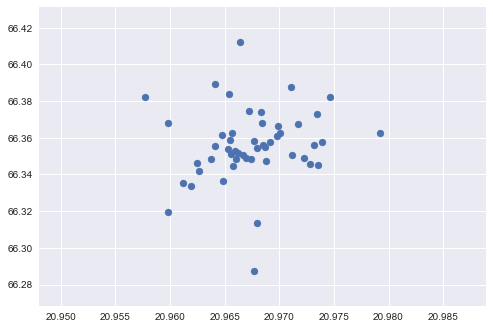

In [389]:
plt.scatter( x=minsdf['optk'],y= minsdf['optHF'])
plt.show()

In [ ]:
#Finish Scatter Plot with Optimizer
#Rerun with 3 variables, k, initHF, Hk using old Hk methodology average (R-E)
#2-3 plots in a slide Plot 1: Showing optimizer works, Plot 2: HFA vs time Plot 3: Plot 3: HFA vs sum(R/N)

In [401]:
columns=['HFA', 'Year', 'Results']
HFATimePlotdf=pd.DataFrame(HFATimePlot, columns=columns)

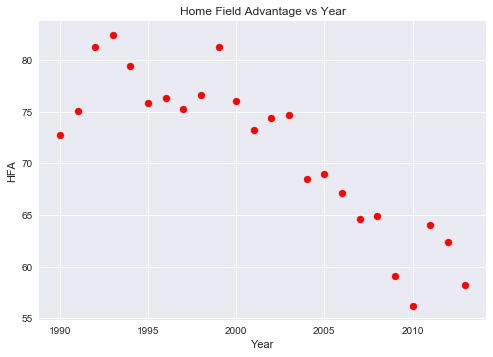

In [410]:
plt.scatter(x=HFATimePlotdf['Year'],y= HFATimePlotdf['HFA'], color='R')
plt.xlabel('Year')
plt.ylabel('HFA')
plt.title('Home Field Advantage vs Year')
plt.savefig('HFA vs Year.png')
plt.show()

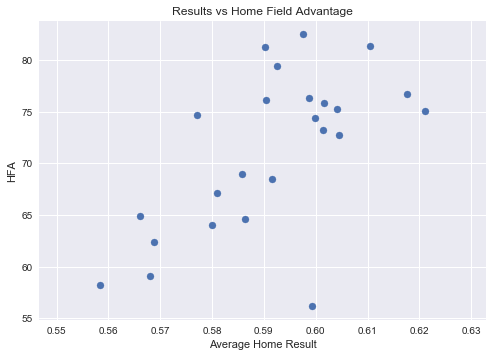

In [411]:
plt.scatter(x=HFATimePlotdf['Results'],y= HFATimePlotdf['HFA'])
plt.xlabel('Average Home Result')
plt.ylabel('HFA')
plt.title('Results vs Home Field Advantage')
plt.savefig('Results vs Home Field Advantage')
plt.show()